In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
hd=pd.read_csv("heart_d.csv")
hd.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2


In [47]:
hd.describe()

,age,sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,0.745000
std,7.811697,0.171015,0.795701,0.683455,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,2.000000,1.000000


In [48]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age         200 non-null int64
sex         200 non-null int64
cp          200 non-null int64
trestbps    200 non-null object
chol        200 non-null object
fbs         200 non-null object
restecg     200 non-null int64
 thalach    200 non-null object
exang       200 non-null object
oldpeak     200 non-null object
slope       200 non-null object
ca          200 non-null object
thal        200 non-null object
num         200 non-null int64
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [50]:
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
 thalach    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [51]:
hd.corr()

,age,sex,cp,restecg,num
age,1.000000,0.034230,-0.038280,0.002400,0.189692
sex,0.034230,1.000000,0.038036,0.060621,0.098854
cp,-0.038280,0.038036,1.000000,0.034790,0.256614
restecg,0.002400,0.060621,0.034790,1.000000,-0.059146
num,0.189692,0.098854,0.256614,-0.059146,1.000000


In [3]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
 thalach    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [8]:
hd['num'] = hd.num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [10]:
hd=hd.replace('?',0)

In [52]:
hd.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,0,0,1
1,44,1,4,130,209,0,1,127,0,0,0,0,0,0


In [12]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
 thalach    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# EDA

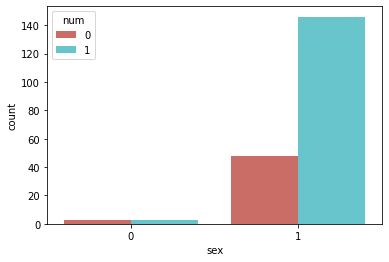

In [14]:
sns.countplot(x='sex', data=hd, palette='hls', hue='num')
plt.show()

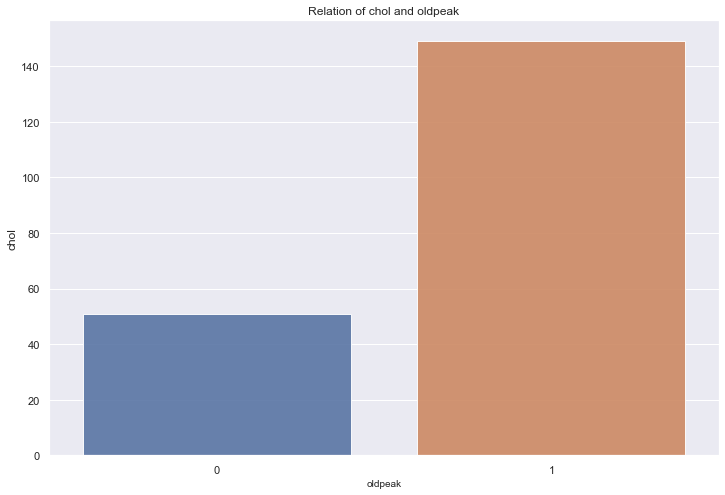

In [66]:
plt.figure(figsize=(12, 8))
JobRole_count = hd['num'].value_counts()
sns.set(style="darkgrid")
sns.barplot(JobRole_count.index, JobRole_count.values, alpha=0.9)
plt.title('Relation of chol and oldpeak')
plt.ylabel('chol', fontsize=12)
plt.xlabel('oldpeak', fontsize=10)
plt.show()

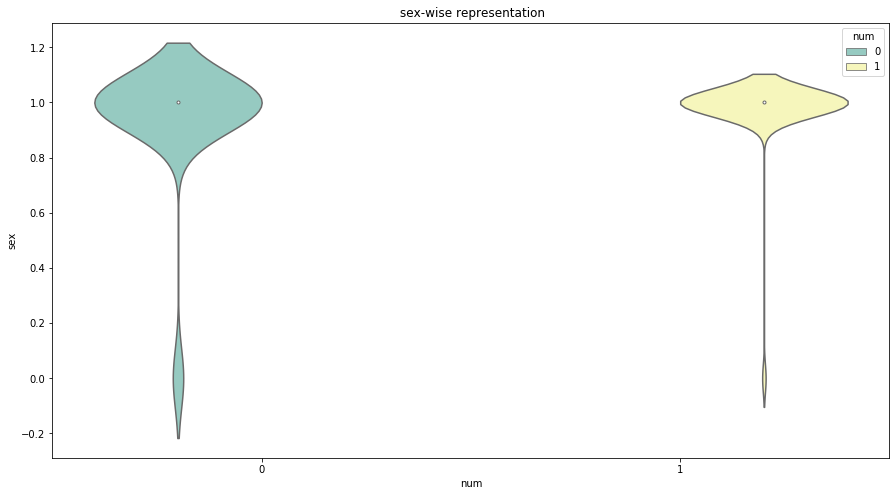

In [57]:
fig, ax = plt.subplots(figsize=(15, 8))  
sns.violinplot(y='sex', x='num', hue='num', data=hd, ax=ax, palette="Set3")  
ax.set_title(' sex-wise representation')  
plt.show() 

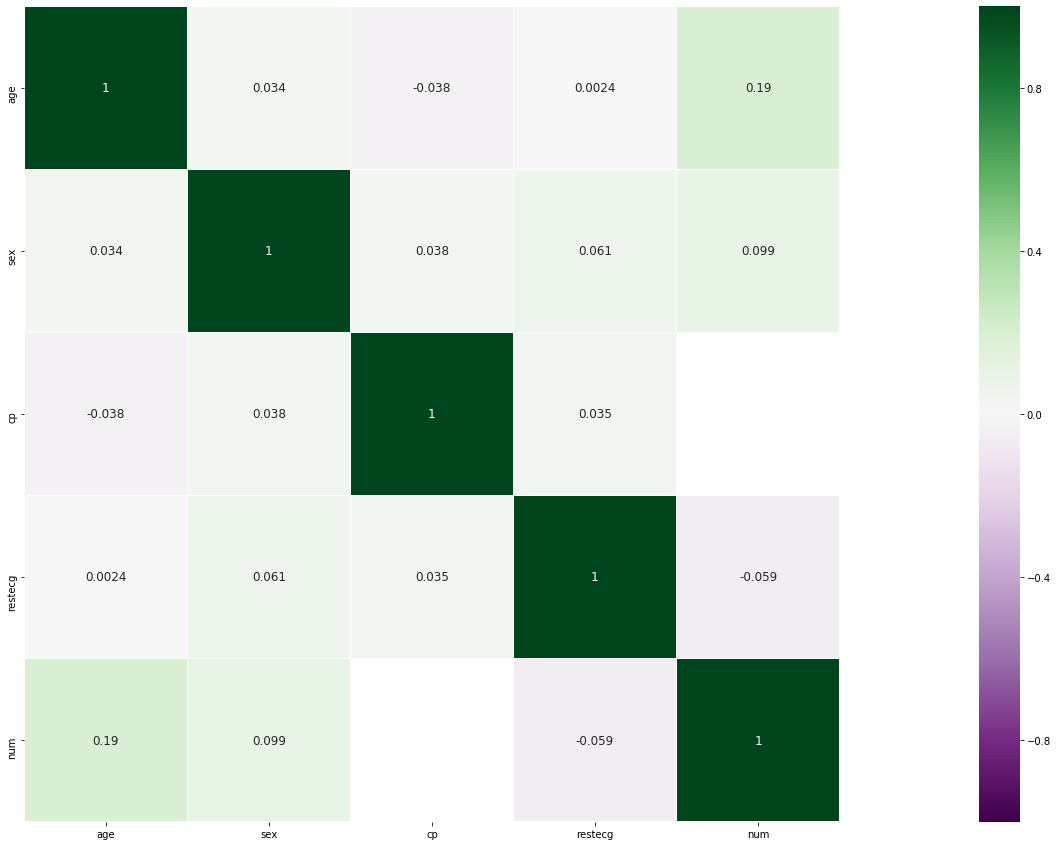

In [65]:
hd_corr = hd.corr()

plt.figure(figsize=(50, 15))

sns.heatmap(hd_corr[(hd_corr >= 0.4) | (hd_corr <= 0.2)], 
            cmap='PRGn', vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot=True, annot_kws={"size": 12}, square=True)
plt.show()

# Train Test Split

In [15]:
x=hd.iloc[:,2:13]
y=hd.iloc[:,-1]

In [25]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
sc = StandardScaler()
ss = sc.fit_transform(x)
print(ss.shape)

(200, 11)


In [27]:
target=hd['num'].values.reshape(-1,1)
print(target.shape)

(200, 1)


In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [28]:
x_train, x_test, y_train, y_test = train_test_split(ss,target, test_size= 0.25, random_state=42)

In [29]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
mlp=mlp.fit(x_train, y_train)

Iteration 1, loss = 0.69423548
Iteration 2, loss = 0.69347594
Iteration 3, loss = 0.69240079
Iteration 4, loss = 0.69105048
Iteration 5, loss = 0.68946350
Iteration 6, loss = 0.68767532
Iteration 7, loss = 0.68571697
Iteration 8, loss = 0.68361558
Iteration 9, loss = 0.68139975
Iteration 10, loss = 0.67909310
Iteration 11, loss = 0.67672054
Iteration 12, loss = 0.67429880
Iteration 13, loss = 0.67184432
Iteration 14, loss = 0.66936965
Iteration 15, loss = 0.66688777
Iteration 16, loss = 0.66441351
Iteration 17, loss = 0.66196080
Iteration 18, loss = 0.65953072
Iteration 19, loss = 0.65713349
Iteration 20, loss = 0.65477831
Iteration 21, loss = 0.65247204
Iteration 22, loss = 0.65021615
Iteration 23, loss = 0.64801348
Iteration 24, loss = 0.64585969
Iteration 25, loss = 0.64375932
Iteration 26, loss = 0.64171662
Iteration 27, loss = 0.63973387
Iteration 28, loss = 0.63781005
Iteration 29, loss = 0.63594364
Iteration 30, loss = 0.63413389
Iteration 31, loss = 0.63237781
Iteration 32, los

In [15]:
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(mlp, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_mlp = mlp.predict(x_test)
print("Accuracy Score of the MLP classifier: ", accuracy_score(y_test, y_pred_mlp))

Iteration 1, loss = 0.72054769
Iteration 2, loss = 0.71987507
Iteration 3, loss = 0.71906665
Iteration 4, loss = 0.71795755
Iteration 5, loss = 0.71660402
Iteration 6, loss = 0.71502996
Iteration 7, loss = 0.71335529
Iteration 8, loss = 0.71149498
Iteration 9, loss = 0.70955923
Iteration 10, loss = 0.70765423
Iteration 11, loss = 0.70576997
Iteration 12, loss = 0.70380060
Iteration 13, loss = 0.70177610
Iteration 14, loss = 0.69979521
Iteration 15, loss = 0.69776059
Iteration 16, loss = 0.69561109
Iteration 17, loss = 0.69341117
Iteration 18, loss = 0.69149310
Iteration 19, loss = 0.68965285
Iteration 20, loss = 0.68790251
Iteration 21, loss = 0.68619263
Iteration 22, loss = 0.68464806
Iteration 23, loss = 0.68288729
Iteration 24, loss = 0.68102423
Iteration 25, loss = 0.67897952
Iteration 26, loss = 0.67711626
Iteration 27, loss = 0.67516944
Iteration 28, loss = 0.67336731
Iteration 29, loss = 0.67151684
Iteration 30, loss = 0.66953458
Iteration 31, loss = 0.66732126
Iteration 32, los

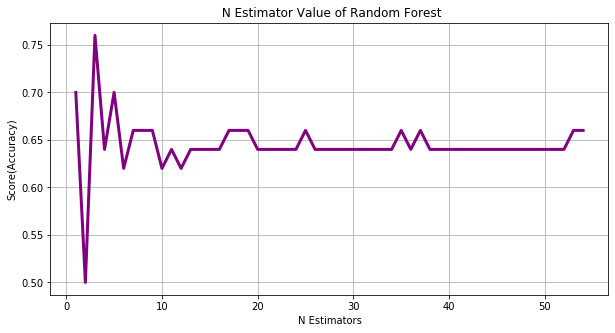

In [41]:
from sklearn.ensemble import RandomForestClassifier
scores = []
for each in range(1,55):
    RF = RandomForestClassifier(n_estimators = each,random_state=5)
    RF.fit(x_train,y_train)
    scores.append(RF.score(x_test, y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,55),scores,color="purple",linewidth=3)
plt.title(" N Estimator Value of Random Forest")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

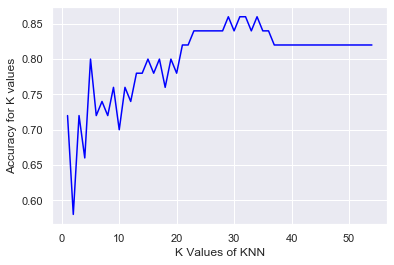

In [68]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
for n in range(1,55):
    KNNfind = KNeighborsClassifier(n_neighbors = n)
    KNNfind.fit(x_train,y_train)
    scores.append(KNNfind.score(x_test,y_test))
    
plt.plot(range(1,55),scores,color="blue")
plt.xlabel("K Values of KNN")
plt.ylabel("Accuracy for K values")
plt.show()

In [35]:
KNN = KNeighborsClassifier(n_neighbors = 41) 
KNN=KNN.fit(x_train, y_train)
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(KNN, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_knn = KNN.predict(x_test)
print("Accuracy Score of the KNN classifier: ", accuracy_score(y_test, y_pred_knn))

Mean Accuracy of Cross Validation: % 70.7
Std of Accuracy of Cross Validation: % 3.0
Accuracy Score of the KNN classifier:  0.82


In [38]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT=DT.fit(x_train, y_train)
y_pred_dt = DT.predict(x_test)
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(DT, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_dt = DT.predict(x_test)
print("Accuracy Score of the DT classifier: ", accuracy_score(y_test, y_pred_dt))

Mean Accuracy of Cross Validation: % 71.01
Std of Accuracy of Cross Validation: % 14.0
Accuracy Score of the DT classifier:  0.58


In [44]:
gnb=GaussianNB()
gnb=gnb.fit(x_train, y_train)
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(gnb, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_gnb = gnb.predict(x_test)
print("Accuracy Score of the NB classifier: ", accuracy_score(y_test, y_pred_gnb))

Mean Accuracy of Cross Validation: % 65.55
Std of Accuracy of Cross Validation: % 10.0
Accuracy Score of the NB classifier:  0.62


In [36]:
SVM = SVC()
SVM=SVM.fit(x_train, y_train)
y_pred_svm = SVM.predict(x_test)
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(SVM, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_svm = SVM.predict(x_test)
print("Accuracy Score of the SVM classifier: ", accuracy_score(y_test, y_pred_svm))

Mean Accuracy of Cross Validation: % 74.71
Std of Accuracy of Cross Validation: % 11.0
Accuracy Score of the SVM classifier:  0.86


In [42]:
RF= RandomForestClassifier(n_estimators = 42) 
RF=RF.fit(x_train, y_train)
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(RF, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_rf = RF.predict(x_test)
print("Accuracy Score of the DT classifier: ", accuracy_score(y_test, y_pred_rf))

Mean Accuracy of Cross Validation: % 76.62
Std of Accuracy of Cross Validation: % 10.0
Accuracy Score of the DT classifier:  0.72


In [43]:
xg = XGBClassifier()
xg=xg.fit(x_train, y_train)
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(xg, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_xg = xg.predict(x_test)
print("Accuracy Score of the XGB classifier: ", accuracy_score(y_test, y_pred_xg))

Mean Accuracy of Cross Validation: % 72.7
Std of Accuracy of Cross Validation: % 11.0
Accuracy Score of the XGB classifier:  0.58


In [45]:
svc_params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                      'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)
svc = grid_svc.best_estimator_
print("Best Parameters for SVM: ", grid_svc.best_estimator_)
print("Best Score for SVM: ", grid_svc.best_score_)

from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(grid_svc, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))

Best Parameters for SVM:  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Best Score for SVM:  0.7666666666666667
Mean Accuracy of Cross Validation: % 69.24
Std of Accuracy of Cross Validation: % 9.0


In [46]:
mlp_params = {'alpha':[0.0001], 'activation': ['relu', 'tanh',], 
              'solver':['lbfgs', 'adam'], 'hidden_layer_sizes': [(100,14,7)], 
              'learning_rate':['adaptive']}
              
              
grid_mlp = GridSearchCV(MLPClassifier(), mlp_params)
grid_mlp.fit(x_train, y_train)
              

mlp_new = grid_mlp.best_estimator_
print("Best Parameters for MLP: ", grid_mlp.best_estimator_)
print("Best Score for MLP: ", grid_mlp.best_score_)

from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(grid_mlp, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))

Best Parameters for MLP:  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 14, 7), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
Best Score for MLP:  0.72
Mean Accuracy of Cross Validation: % 72.67
Std of Accuracy of Cross Validation: % 11.0


In [ ]:
pred = pd.DataFrame(y_pred_gnb, columns=['GNB_predHeart'])   # save the file
pred.to_csv('heart_d.csv')